## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [211]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB


### Import Iris.csv

In [212]:
Iris_df = pd.read_csv('Iris.csv', header = 0)

In [213]:
# Check dimension of data


In [214]:
Iris_df.shape

(152, 6)

In [215]:
#Check data Type

In [216]:
Iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [217]:
# Check for NaN/Null values
print("Sum of Nan\n:", Iris_df.isna().sum())
print("Sum of Null",Iris_df.isnull().sum())

Sum of Nan
: Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64
Sum of Null Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64


### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

In [218]:
Iris_df= Iris_df.replace(np.nan,Iris_df.mean())

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [219]:
Y = Iris_df['Species']
X = Iris_df.drop(columns=['Species'])

In [220]:
#Check the dataset
print(Y)
print(X)
print(Y.shape)
print(X.shape)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iris-virginica
135    Iris-virginica
136    Iri

### Find the distribution of target variable (Class) (1 Marks)

In [221]:
## Target Variable Frequency Distribution
freq = Y.value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

,Species,count,prop
0,Iris-virginica,52,0.342105
1,Iris-versicolor,50,0.328947
2,Iris-setosa,50,0.328947


### Plot the distribution of target variable using histogram

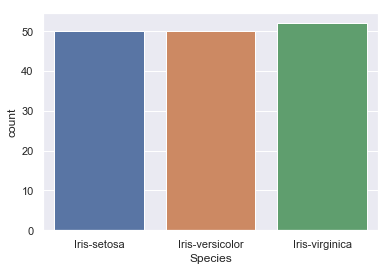

In [222]:
import seaborn as sns
sns.countplot(Y)

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED3CA3EE80>,
      dtype=object)

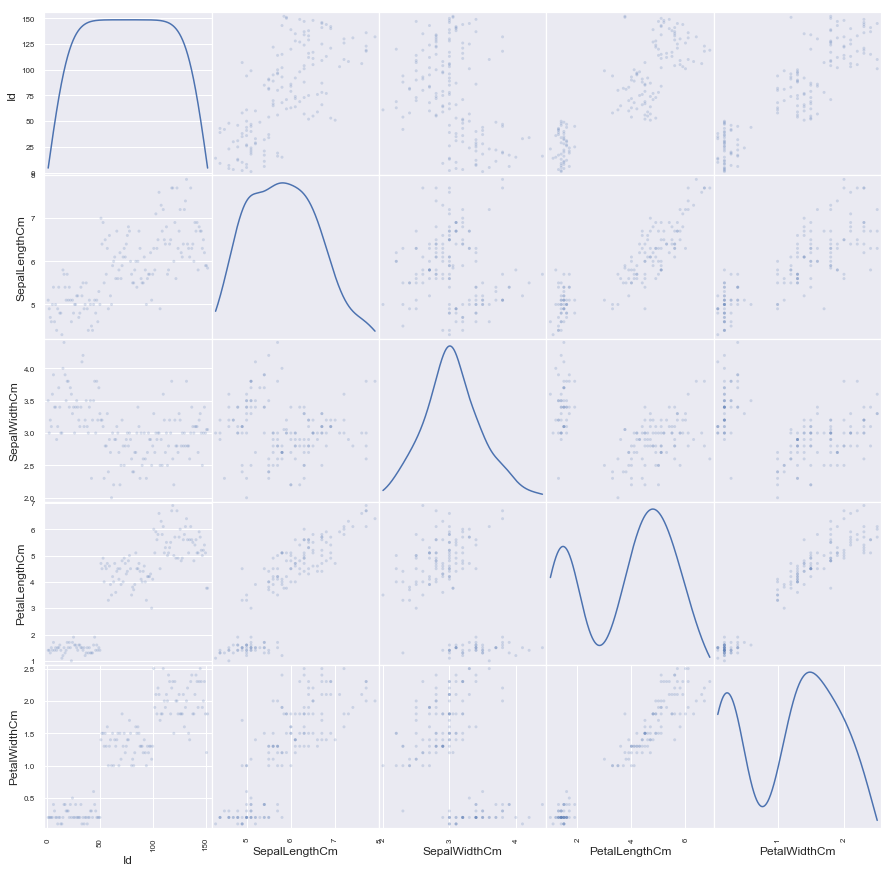

In [223]:
from pandas.plotting import scatter_matrix
scatter_matrix(Iris_df, alpha=0.2,diagonal='kde',figsize=(15, 15))

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [224]:
Iris_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,152,NaN,NaN,NaN,76.5,44.0227,1,38.75,76.5,114.25,152
SepalLengthCm,152,NaN,NaN,NaN,5.84371,0.822577,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,152,NaN,NaN,NaN,3.054,0.430713,2,2.8,3,3.3,4.4
PetalLengthCm,152,NaN,NaN,NaN,3.75867,1.7527,1,1.6,4.3,5.1,6.9
PetalWidthCm,152,NaN,NaN,NaN,1.20265,0.759657,0.1,0.3,1.3,1.8,2.5
Species,152,3,Iris-virginica,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From Above Summary, we can see that
1. Standard deviation of Sepal length is 0.82, standard deviation of Petal width is 1.76
2. Target variable Species does not have any missing values whereas others have.
3. Target variable has 3 categaries.

In [225]:
#Drop Id variable from data

X = X.drop(columns='Id')

### Correlation among all variables and give your insights (1 Marks)

In [226]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here
corr = X.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109368,0.871741,0.816256
SepalWidthCm,-0.109368,1.000000,-0.420516,-0.355808
PetalLengthCm,0.871741,-0.420516,1.000000,0.960771
PetalWidthCm,0.816256,-0.355808,0.960771,1.000000


We can see that every variable has a high correlation so will not drop any variable here.

### Split data in Training and Validation in 80:20 (1 Marks)

In [227]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state = 100)

### Do Feature Scaling ( 1 Marks)

In [228]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
print(scaler.fit(X_train))
print(scaler.mean_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[5.84380165 3.03515702 3.79717906 1.2215095 ]


### Train and Fit NaiveBayes Model(2 Marks)

In [229]:
#Fit the model

In [230]:
clf = GaussianNB()
GNB = clf.fit(X_train, y_train)
print(GNB)

GaussianNB(priors=None)


In [231]:
#Predict
from sklearn import metrics
y_predict = GNB.predict(X_test)
print(y_predict)
print(GNB.score(X_train,y_train))
print(GNB.score(X_test,y_predict))

['Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor']
0.9504132231404959
1.0


### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [232]:
# show Confusion Matrix

In [233]:
conf_mat = metrics.confusion_matrix(y_test, y_predict)
print(conf_mat)

[[12  0  0]
 [ 0  7  0]
 [ 0  3  9]]


In [234]:
# show accuracy

In [235]:
GNB.score(X_train,y_train)

0.9504132231404959

In [236]:
#Show precision and Recall metrics

In [237]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_predict, average='macro') 

(0.9, 0.9166666666666666, 0.8935574229691876, None)

In [239]:
true_pos = np.diag(conf_mat) 
precision = np.sum(true_pos / np.sum(conf_mat, axis=0))
recall = np.sum(true_pos / np.sum(conf_mat, axis=1))

print(recall)
print(precision)

2.75
2.7


## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [240]:
import warnings 
warnings.filterwarnings('ignore')

In [241]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import os

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [242]:
Iris_knn_df = pd.read_csv('Iris.csv', header = 0)

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [243]:
Iris_knn_df.fillna(Iris_knn_df.median(), inplace = True)
Iris_knn_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,Iris-setosa
1,2,4.9,3.0,1.40,0.2,Iris-setosa
2,3,4.7,3.2,1.30,0.2,Iris-setosa
3,4,4.6,3.1,1.50,0.2,Iris-setosa
4,5,5.0,3.6,1.40,0.2,Iris-setosa
5,6,5.4,3.9,1.70,0.4,Iris-setosa
6,7,4.6,3.4,1.40,0.3,Iris-setosa
7,8,5.0,3.4,1.50,0.2,Iris-setosa
8,9,4.4,2.9,1.40,0.2,Iris-setosa
9,10,4.9,3.1,1.50,0.1,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [244]:
Iris_knn_df_new = Iris_knn_df

Iris_cat = {"Species": {"Iris-setosa" : 0, "Iris-versicolor" : 1, "Iris-virginica": 2}}

Iris_knn_df_new.replace(Iris_cat, inplace = True)
Iris_knn_df_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [245]:
print(Iris_knn_df_new)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5           1.40           0.2        0
1      2            4.9           3.0           1.40           0.2        0
2      3            4.7           3.2           1.30           0.2        0
3      4            4.6           3.1           1.50           0.2        0
4      5            5.0           3.6           1.40           0.2        0
5      6            5.4           3.9           1.70           0.4        0
6      7            4.6           3.4           1.40           0.3        0
7      8            5.0           3.4           1.50           0.2        0
8      9            4.4           2.9           1.40           0.2        0
9     10            4.9           3.1           1.50           0.1        0
10    11            5.4           3.7           1.50           0.2        0
11    12            4.8           3.4           1.60           0.2        0
12    13    

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [246]:
Iris_knn_df_new.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


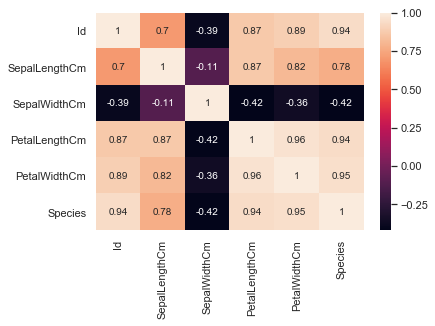

In [247]:
sns.heatmap(Iris_knn_df_new.corr(),annot=True)

No Column falls under the -.1 to .1 range. So I am not dropping any column here.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [248]:
Iris_knn_df_new = Iris_knn_df_new.drop(columns='Id')

In [249]:
Y = Iris_knn_df_new['Species']
X = Iris_knn_df_new.drop(columns='Species')
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5           1.40           0.2
1              4.9           3.0           1.40           0.2
2              4.7           3.2           1.30           0.2
3              4.6           3.1           1.50           0.2
4              5.0           3.6           1.40           0.2
5              5.4           3.9           1.70           0.4
6              4.6           3.4           1.40           0.3
7              5.0           3.4           1.50           0.2
8              4.4           2.9           1.40           0.2
9              4.9           3.1           1.50           0.1
10             5.4           3.7           1.50           0.2
11             4.8           3.4           1.60           0.2
12             4.8           3.0           1.40           0.1
13             4.3           3.0           1.10           0.1
14             5.8           4.0           1.20           0.2
15      

In [250]:
Iris_knn_df_new.var()

SepalLengthCm    0.676645
SepalWidthCm     0.185552
PetalLengthCm    3.076516
PetalWidthCm     0.577141
Species          0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

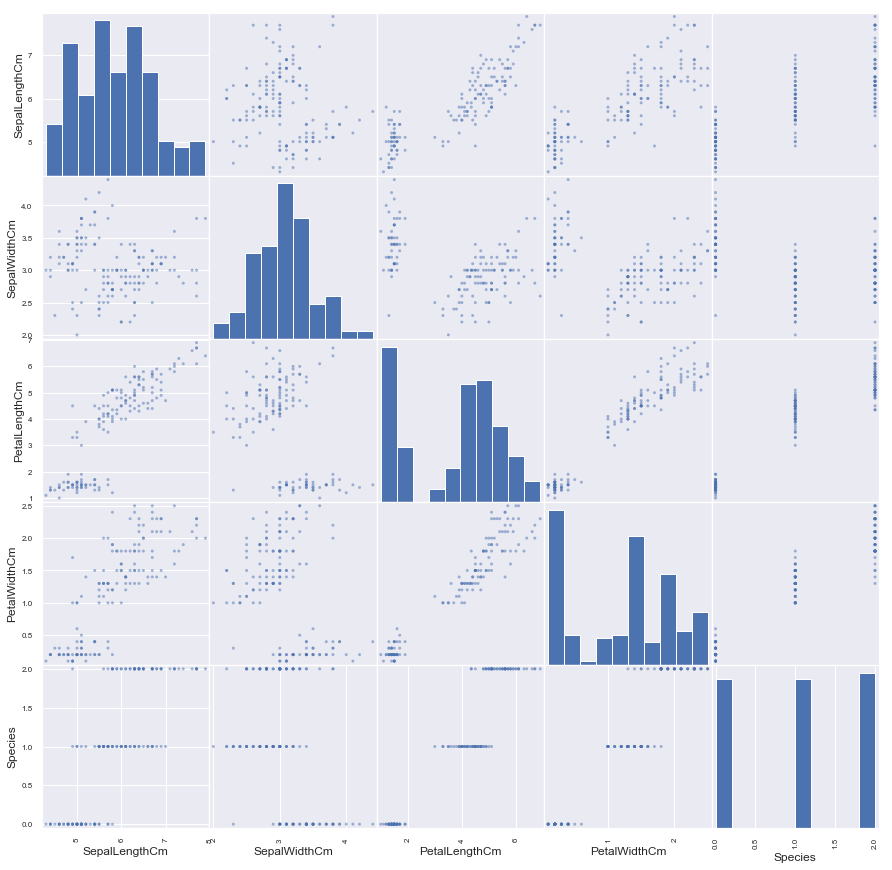

In [251]:
pd.scatter_matrix(Iris_knn_df_new,figsize=(15,15))
plt.show()

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [253]:
from sklearn import neighbors

In [254]:
from sklearn.model_selection import train_test_split
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X, Y, test_size=0.20,random_state = 100)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [255]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
i=np.array([3,5,9])
n=0
while n<=len(i)-1:
    k=i[n]
    KNN_model = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', metric = 'euclidean')
    KNN_model.fit(X_train_KNN,y_train_KNN)
    y_pred_train = KNN_model.predict(X_train_KNN)
    y_pred_test=KNN_model.predict(X_test_KNN)
    print('\nAccuracy for train dataset for (K=',k,')=',1-accuracy_score(y_train_KNN,y_pred_train))
    print('Accuracy for test dataset for (K=',k,')=',1-accuracy_score(y_test_KNN,y_pred_test))
    n=n+1


Accuracy for train dataset for (K= 3 )= 0.04958677685950408
Accuracy for test dataset for (K= 3 )= 0.06451612903225812

Accuracy for train dataset for (K= 5 )= 0.04132231404958675
Accuracy for test dataset for (K= 5 )= 0.06451612903225812

Accuracy for train dataset for (K= 9 )= 0.04132231404958675
Accuracy for test dataset for (K= 9 )= 0.06451612903225812


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [257]:
j = np.arange(1,19,2)
n=0
MSE=[]
k_val=[]
while n<=len(j)-1:
    k=j[n]
    KNN_model = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', metric = 'euclidean')
    KNN_model.fit(X_train_KNN,y_train_KNN)
    y_pred_train = KNN_model.predict(X_train_KNN)
    MSE.append(1-accuracy_score(y_train_KNN,y_pred_train))
    k_val.append(k)
    dataplot=pd.DataFrame([k_val,MSE]).T
    n=n+1
    dataplot.columns=['k','MSE']

dataplot

,k,MSE
0,1.0,0.000000
1,3.0,0.049587
2,5.0,0.041322
3,7.0,0.041322
4,9.0,0.041322
5,11.0,0.041322
6,13.0,0.033058
7,15.0,0.041322
8,17.0,0.033058


At k= 13, we have lowest MSE so will take k = 13.

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

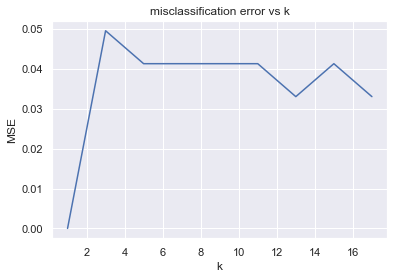

In [258]:
py=sns.lineplot(x='k', y='MSE',data=dataplot).set_title('misclassification error vs k')